# Distances

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [41]:
df = pd.read_csv('../data/ru_lat_lng_clear.csv')

In [42]:
df.head(2)

,name,country,subcountry,geonameid,lat,lng
0,Udomlya,Russia,Tverskaya,452949,57.876779,35.005110
1,Sosnovka,Russia,St.-Petersburg,461698,56.253352,51.283364


[great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance)

In [43]:
import math
from math import cos, sin, sqrt, atan
def angleDist(lat1, lng1, lat2, lng2):
    lat1 = math.radians(lat1)
    lng1 = math.radians(lng1)
    lat2 = math.radians(lat2)
    lng2 = math.radians(lng2)
    phi1 = lat1
    phi2 = lat2
    dl = (lng1 - lng2)
    n = (sqrt((cos(phi2)*sin(dl))**2
             +(cos(phi1)*sin(phi1)-sin(phi1)*cos(phi2)*cos(dl))**2))
    d = sin(phi1)*sin(phi2)+cos(phi1)*cos(phi2)*cos(dl)
    sigma = atan(n/d)
    
    return sigma

Add ang dist?

In [44]:
mat = pd.crosstab(df['name'], df['name']).astype(float)

In [45]:
for i in range(df.shape[0]):
    for j in range(i + 1, df.shape[0]):
        r1 = df.iloc[i]
        r2 = df.iloc[j]
        dist = angleDist(r1['lat'], r1['lng'], r2['lat'], r2['lng'])
        mat[r1['name']][r2['name']] = dist
        mat[r2['name']][r1['name']] = dist

In [46]:
mat.to_csv('../data/ru_dist_mat.csv', index = False)

In [50]:
mat_cpy = mat.copy()

In [49]:
mat.P

Index(['Abakan', 'Abdulino', 'Abinsk', 'Achinsk', 'Achkhoy-Martan', 'Adler',
       'Afipskiy', 'Agidel’', 'Agryz', 'Akademgorodok',
       ...
       'Zhukovka', 'Zhukovskiy', 'Zima', 'Zimovniki', 'Zlatoust', 'Znamensk',
       'Zvenigorod', 'Zverevo', 'Zyablikovo', 'Zyuzino'],
      dtype='object', name='name', length=920)

# Dropping large distances

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium

In [38]:
mat = pd.read_csv('../data/ru_dist_mat.csv', )

In [32]:
dist_vals = pd.Series(mat.values.ravel())

In [33]:
dist_vals.shape

(847320,)

TypeError: can only concatenate str (not "float") to str

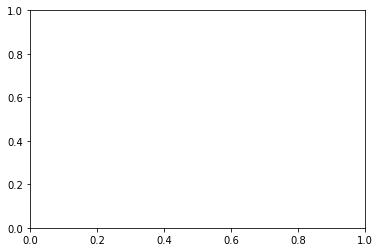

In [34]:
sns.distplot(dist_vals);

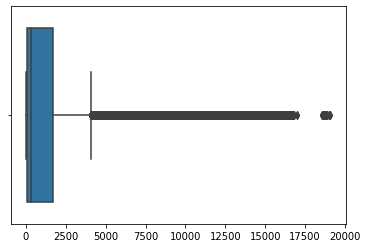

In [56]:
sns.boxplot(dist_vals);

In [61]:
q = dist_vals.quantile(0.80)
print(q)

2305.0


In [62]:
dist_q = dist_vals[dist_vals < q]

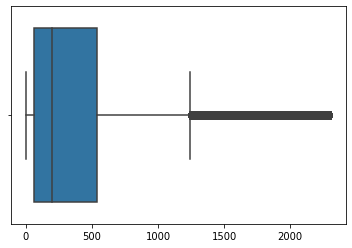

In [63]:
sns.boxplot(dist_q);

In [64]:
dist_q.shape

(677072,)